# 2. Calculating Docking Score from DiffDock+Vina

DiffDock is a pose generator and does not predict a docking pose that can be compared across ligands. It only predicts a confidence value, which it uses to rank poses predicted for the same protein-ligand complex as most or least likely. In order to rank poses generated by DiffDock, we would need to rescore them with a physics-based technique like Vina.

For this, Autodock Vina calculation were performed on the poses generated by DiffDock. To the read the `.pdbqt` files outputted by this run, we import the `get_first_mol_from_pdbqt` function:

In [1]:
import sys
sys.path.append('..')
from pdbqt import get_first_mol_from_pdbqt

The `pdbqt` files of the redocked structures are loaded into a DataFrame:

In [2]:
import pandas as pd
from pathlib import Path

df = pd.DataFrame([str(i) for i in list(Path("poses/").rglob("*.pdbqt"))])
df.columns = ['file']
df['score'] = df['file'].apply(lambda x: get_first_mol_from_pdbqt(x, return_type='score_only'))
df['file'] = df['file'].apply(lambda x: x.split('/')[-1])
df.columns = ['file','diffdock_score']

The `pdbqt` files of the purely-Vina docked structures are also loaded into another DataFrame:

In [3]:
df2 = pd.DataFrame([str(i) for i in list(Path("vina_docking/").rglob("*.pdbqt"))])
df2.columns = ['file']
df2['score'] = df2['file'].apply(lambda x: pd.Series(get_first_mol_from_pdbqt(x, return_type='score_only')))
df2['file'] = df2['file'].apply(lambda x: x.split('/')[-1])
df2.columns = ['file', 'vina_score']

These two are merged on the file name:

In [4]:
merged_df = pd.merge(df, df2, on='file', how='inner')

and results are plotted below:

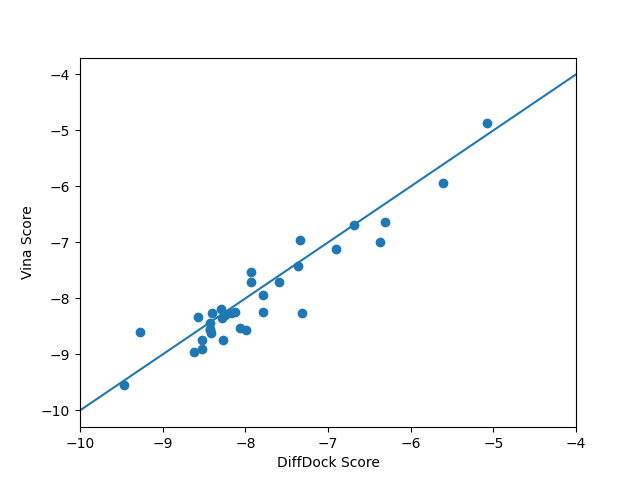

In [5]:
%matplotlib widget
import matplotlib.pyplot as plt

plt.scatter(merged_df['diffdock_score'], merged_df['vina_score'])
# Define the x-values
x = list(range(-10, -3))

# Plot the line
plt.plot(x, x)
plt.xlabel("DiffDock Score")
plt.ylabel("Vina Score")
plt.xlim(-10, -4) 
plt.show()

It can be seen that the scores largely follow a linear relationship. This means that DiffDock has found poses with similar, but not lower energies to those found by Autodock Vina.